In [1]:
import pandas_ta
import pandas as pd
from sklearn.linear_model import LinearRegression
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import models, utils
import matplotlib

In [2]:
df = pd.read_excel('./VCI.xlsx')
df

,Symbol,Market,TradingDate,Time,Open,High,Low,Close,Volume,Value
0,VCI,HOSE,03/01/2023,NaN,22899,25006,22899,24599,4584500,1.121176e+11
1,VCI,HOSE,04/01/2023,NaN,24918,25213,24524,24819,4711000,1.187762e+11
2,VCI,HOSE,05/01/2023,NaN,24869,25804,24672,25706,6055400,1.548309e+11
3,VCI,HOSE,06/01/2023,NaN,25804,26198,25115,25213,5136300,1.343627e+11
4,VCI,HOSE,09/01/2023,NaN,25558,25854,25213,25460,5044400,1.310638e+11
...,...,...,...,...,...,...,...,...,...,...
271,VCI,HOSE,01/02/2024,NaN,43000,43250,42800,43250,5199700,2.238004e+11
272,VCI,HOSE,02/02/2024,NaN,43700,44250,43650,43750,9589400,4.215690e+11
273,VCI,HOSE,05/02/2024,NaN,44000,44200,43600,43900,5832000,2.562005e+11
274,VCI,HOSE,06/02/2024,NaN,44150,45450,44050,44800,7010200,3.152743e+11


In [3]:

df = df.drop(['Symbol','Time','TradingDate','Market'],axis=1)

In [4]:

data_label = df.drop(columns=['Close'])

data_train = df[:200]
data_test = df[200:]

X_train = data_train.drop(columns=['Close'])
y_train = np.array(data_train['Close'])
x_test = data_test.drop(columns=['Close'])
y_test = data_test['Close']
y_test

200    36850
201    36450
202    34000
203    35600
204    35050
       ...  
271    43250
272    43750
273    43900
274    44800
275    45100
Name: Close, Length: 76, dtype: int64

In [5]:
from sklearn.linear_model import Ridge

In [6]:
clfreg = LinearRegression()
clfreg.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred =clfreg.predict(x_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print(rmse)

473.26682553376895


In [16]:
import matplotlib.pyplot as plt


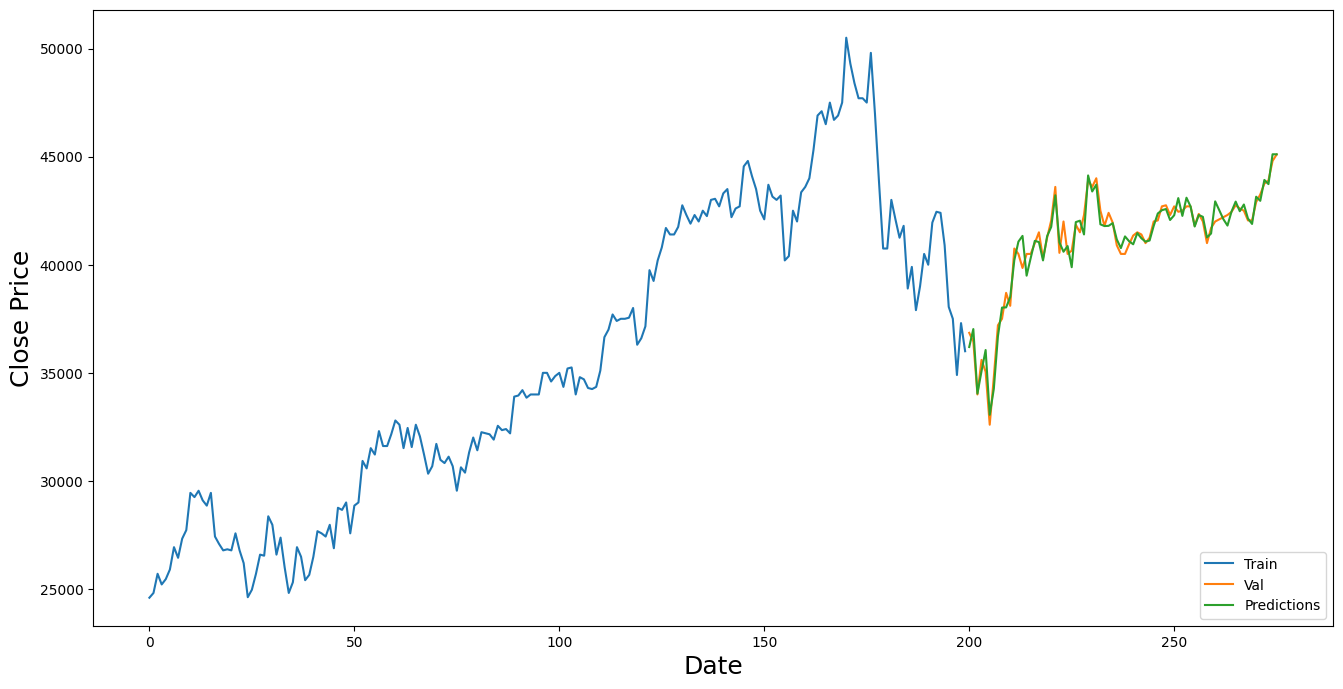

In [17]:
data_test_copy = data_test.copy()


plt.figure(figsize=(16,8))
data_test_copy['Predictions'] = y_pred
plt.plot(data_train['Close'])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price", fontsize = 18)
plt.plot(data_test[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')